In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import xarray as xr

In [3]:
fname = "/Users/kalairamea/Downloads/MPI_ESM1_2_LR_r1i1p1f1_historical_Output.nc"

In [4]:
ds = xr.open_dataset(fname)

In [5]:
ds.data_vars
# To list all the data variables ('field names')

Data variables:
    psl_pre  (time, lat, lon) float64 ...
    psl      (time, lat, lon) float32 ...
    tas_pre  (time, lat, lon) float64 ...
    tas      (time, lat, lon) float32 ...
    pr_pre   (time, lat, lon) float64 ...
    pr       (time, lat, lon) float32 ...

In [6]:
ds.variables
# Use this to see the "long names"

Frozen({'time': <xarray.IndexVariable 'time' (time: 1980)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ..., '2014-10-16T12:00:00.000000000',
       '2014-11-16T00:00:00.000000000', '2014-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time, 'lat': <xarray.IndexVariable 'lat' (lat: 96)>
array([-88.572169, -86.722531, -84.86197 , -82.998942, -81.134977, -79.270559,
       -77.405888, -75.541061, -73.676132, -71.811132, -69.946081, -68.080991,
       -66.215872, -64.35073 , -62.485571, -60.620396, -58.755209, -56.890013,
       -55.024808, -53.159595, -51.294377, -49.429154, -47.563926, -45.698694,
       -43.833459, -41.96822 , -40.102979, -38.237736, -36.372491, -34.507243,
       -32.641994, -30.776744, -28.911492, -27.046239, -25.180986, -23.315731,
       -21.450475, -19.585219, -17.719962, -15.8547

In [7]:
# Another way to look at the details is by calling out the variables directly
ds.pr

<xarray.DataArray 'pr' (time: 1980, lat: 96, lon: 192)>
[36495360 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    long_name:  Precipitation
    units:      kg m-2 s-1

# Map plots of output variables

### Raw temperature values

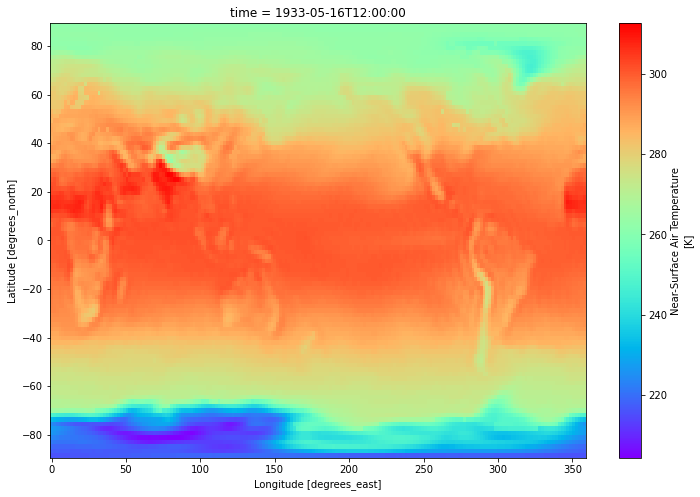

In [8]:
#Simple plot to check how the data looks like
plt.figure(figsize=[12,8])
p = ds.tas[1000].plot(cmap='rainbow')

#Actual Temperature Values

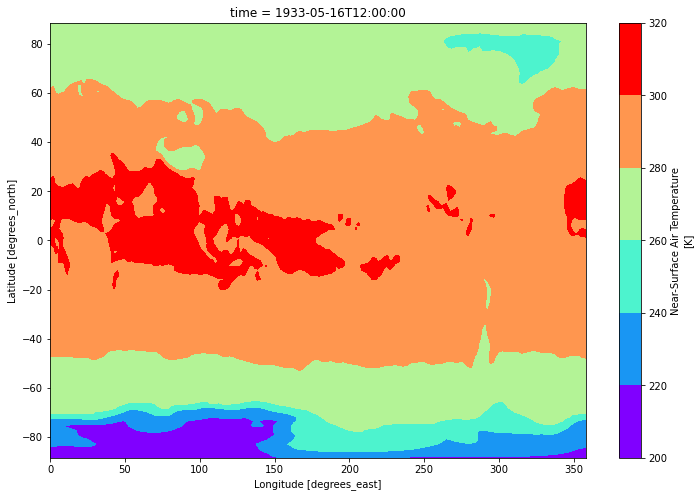

In [46]:
## Optional

## Another way to look at the overall contours
plt.figure(figsize=[12,8])
ds.tas[1000].plot.contourf(cmap='rainbow')

### Processed temperature values


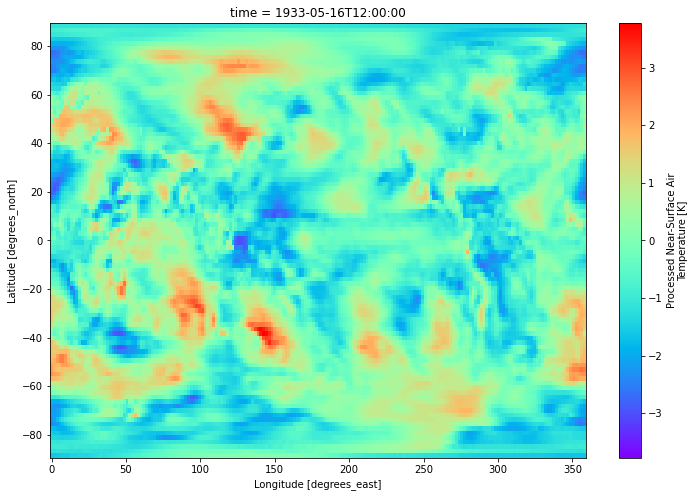

In [9]:
# Processed Temperature Values
plt.figure(figsize=[12,8])
ds.tas_pre[1000].plot(cmap='rainbow')

### Raw precipitation values

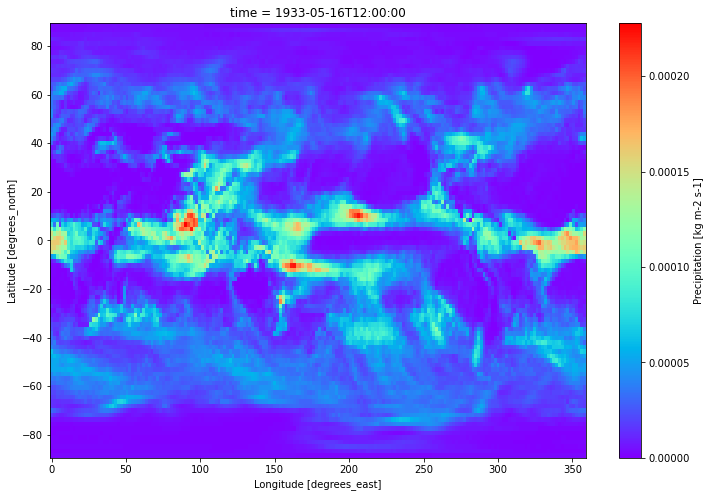

In [10]:
#Simple plot to check how the data looks like
plt.figure(figsize=[12,8])
ds.pr[1000].plot(cmap='rainbow')

### Processed precipitation values

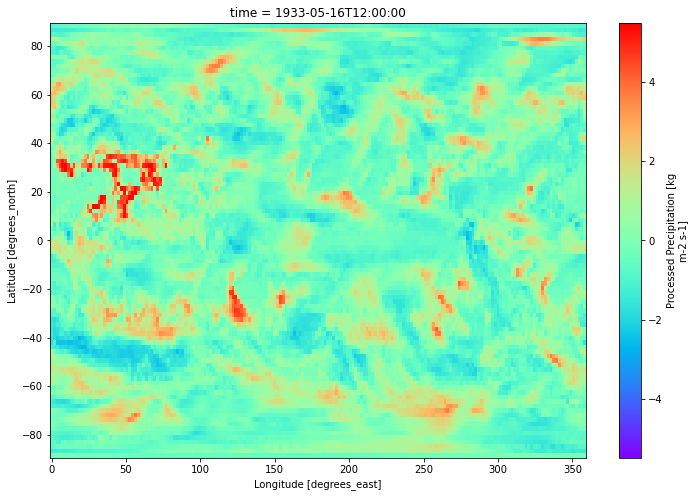

In [11]:
#Simple plot to check how the data looks like
plt.figure(figsize=[12,8])
ds.pr_pre[1000].plot(cmap='rainbow')

### Raw sea level pressure values

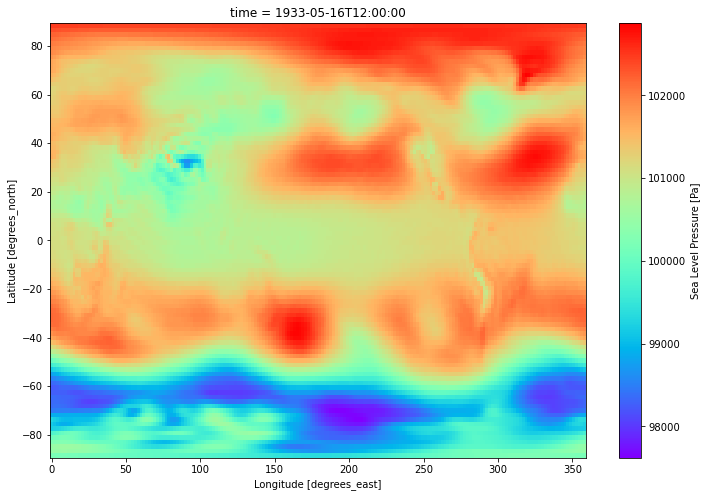

In [18]:
#Simple plot to check how the data looks like
plt.figure(figsize=[12,8])
p = ds.psl[1000].plot(cmap='rainbow')

### Processed sea level pressure values

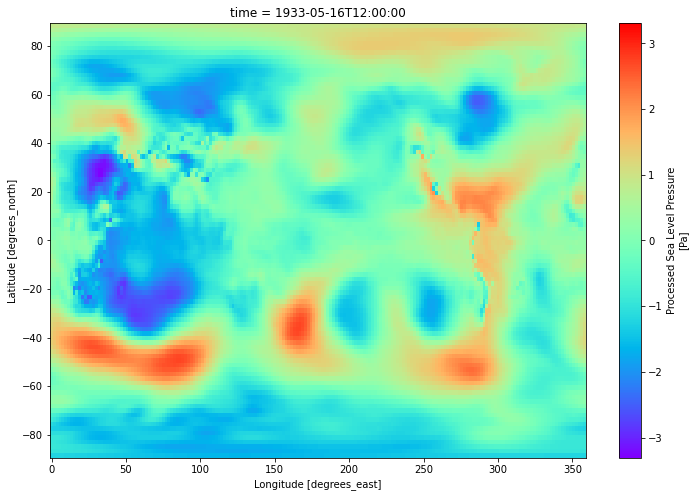

In [19]:
#Simple plot to check how the data looks like
plt.figure(figsize=[12,8])
p = ds.psl_pre[1000].plot(cmap='rainbow')

# Distribution of data

In [12]:
import hvplot.xarray

### Raw temperature values

In [13]:
#Distribution of all the data (raw temperature values)
ds.tas.hvplot()

:NdOverlay   [Element]
   :Histogram   [tas]   (tas_count)

### Processsed temperature values

In [14]:
#Distribution of all the data (processed temperature values)
ds.tas_pre.hvplot()

:NdOverlay   [Element]
   :Histogram   [tas_pre]   (tas_pre_count)

### Raw precipitation values

In [20]:
ds.pr.hvplot()

:NdOverlay   [Element]
   :Histogram   [pr]   (pr_count)

### Processed precipitation values

In [21]:
ds.pr_pre.hvplot()

:NdOverlay   [Element]
   :Histogram   [pr_pre]   (pr_pre_count)

### Raw sea level pressure values

In [22]:
ds.psl.hvplot()

:NdOverlay   [Element]
   :Histogram   [psl]   (psl_count)

### Processed sea level pressure values

In [24]:
ds.psl_pre.hvplot()

:NdOverlay   [Element]
   :Histogram   [psl_pre]   (psl_pre_count)

# Trends

In [51]:
# Look at a particular latitude/longitude
ds.tas.isel(lat=37, lon=-122).hvplot()

:Curve   [time]   (tas)

### To do:

- moving average plots
- Facet plots